# Cat and Dog Classification
Classify images of cats and dogs using Histogram of Oriented Gradients (HOG) for feature extraction and Decision Tree for classification. 

In [1]:
import os
import numpy as np
from skimage.io import imread
from skimage.color import rgb2gray
from skimage.feature import hog
from skimage.transform import resize
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [2]:
# Load dataset
data_dir = './dataset'
images, labels = [], []

for file in os.listdir(data_dir):
    if file.endswith('.jpg'):
        img_path = os.path.join(data_dir, file)
 
        if file.startswith('cat'):
            labels.append(0)  # Cat
        elif file.startswith('dog'):
            labels.append(1)  # Dog
        else:
            continue

        img = imread(img_path)
        img = rgb2gray(img)  # Convert to grayscale
        img_resized = resize(img, (128, 128), anti_aliasing=True)
        images.append(img_resized)

images = np.array(images)
labels = np.array(labels)
print('Images shape:', images.shape)
print('Labels shape:', labels.shape)
print(f'Number of cats: {np.sum(labels == 0)}')
print(f'Number of dogs: {np.sum(labels == 1)}')

Images shape: (615, 128, 128)
Labels shape: (615,)
Number of cats: 260
Number of dogs: 355


In [ ]:
def extract_hog_features(images, visualize=False):
    hog_features_list = []
    hog_images_list = []

    pixels_per_cell = (8, 8)
    cells_per_block = (2, 2)
    orientations = 9

    for image in images:
        features, hog_image = hog(image,
                                  orientations=orientations,
                                  pixels_per_cell=pixels_per_cell,
                                  cells_per_block=cells_per_block,
                                  visualize=True,
                                  feature_vector=True)
        hog_features_list.append(features)
        if visualize:
            hog_images_list.append(hog_image)

    hog_features = np.array(hog_features_list)
    hog_images = np.array(hog_images_list) if visualize else None

    return hog_features, hog_images

In [4]:
def split_and_save_dataset(images, labels, test_size=0.2, train_dir='./dog-cat/train', test_dir='./dog-cat/test'):
    indices = np.arange(len(labels))

    X_train, X_test, y_train, y_test, idx_train, idx_test = train_test_split(
        hog_features,
        labels,
        indices,
        test_size=test_size,
        random_state=42,  
        stratify=labels   
    )
    return X_train, X_test, y_train, y_test, idx_train, idx_test

In [5]:
def train_decision_tree(X_train, y_train):
    clf = DecisionTreeClassifier(random_state=42)

    clf.fit(X_train, y_train)

    return clf

In [6]:
def evaluate_model(clf, X_test, y_test):
    y_pred = clf.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)

    return accuracy, y_pred

Test Accuracy: 0.8618


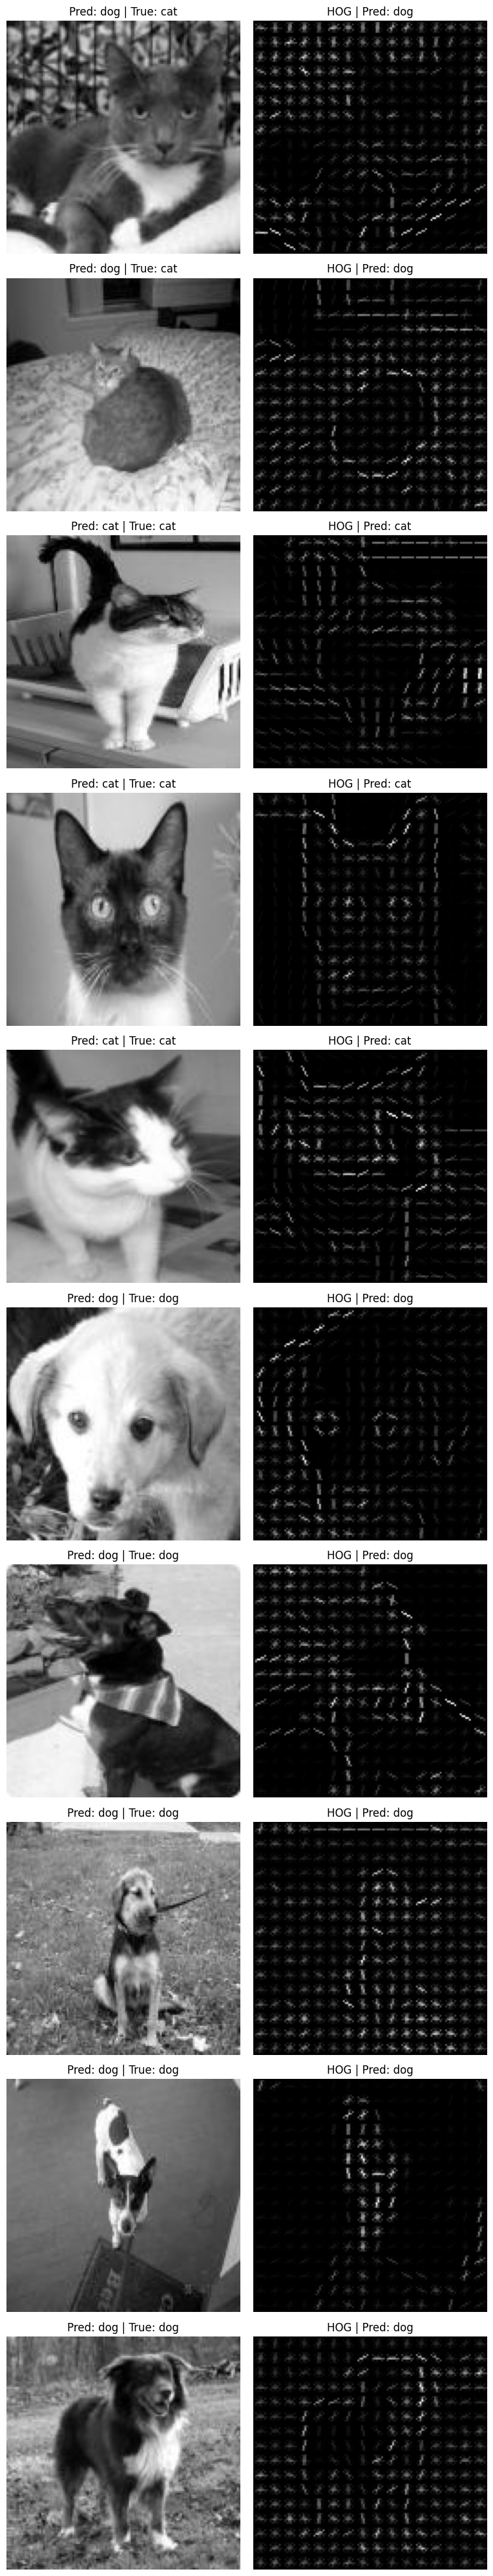

In [7]:
# Extract HOG features
hog_features, hog_images = extract_hog_features(images, visualize=True)

# Split and save dataset
X_train, X_test, y_train, y_test, idx_train, idx_test = split_and_save_dataset(images, labels, test_size=0.2)

# Train Decision Tree
clf = train_decision_tree(X_train, y_train)

# Evaluate model
accuracy, y_pred = evaluate_model(clf, X_test, y_test)
print(f'Test Accuracy: {accuracy:.4f}')

# Visualize results
classes = ['cat', 'dog']
cat_indices = [idx for idx in idx_test if y_test[np.where(idx_test == idx)[0][0]] == 0]
dog_indices = [idx for idx in idx_test if y_test[np.where(idx_test == idx)[0][0]] == 1]
sample_indices = cat_indices[:min(5, len(cat_indices))] + dog_indices[:min(5, len(dog_indices))]

fig, axes = plt.subplots(len(sample_indices), 2, figsize=(8, 4 * len(sample_indices)))
for i, idx in enumerate(sample_indices):
    ax = axes[i, 0] if len(sample_indices) > 1 else axes[0]
    true_label = y_test[np.where(idx_test == idx)[0][0]]
    pred_label = y_pred[np.where(idx_test == idx)[0][0]]
    ax.imshow(images[idx], cmap='gray')
    ax.set_title(f'Pred: {classes[pred_label]} | True: {classes[true_label]}')
    ax.axis('off')

    ax = axes[i, 1] if len(sample_indices) > 1 else axes[1]
    ax.imshow(hog_images[idx], cmap='gray')
    ax.set_title(f'HOG | Pred: {classes[pred_label]}')
    ax.axis('off')

plt.tight_layout()
plt.show()